## Traffic Sign Classification
Name: Youssef Ayman Mohamed
<br>
RegNum: 211000348

## Glossary
1. [Import Libraries](#Import-Libraries)
<br>
3. [Dataset Validation](#dataset-validation)
<br>
3. [Visualisation](#visualisation)
<br>
4. [Model Building](#model-building)
<br>
5. [Evaluation](#Evaluation)
<br>





## Import Libraries

In [189]:
import numpy as np 
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
#from sklearn.ensemble import IsolationForest
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout, GlobalAveragePooling2D
from keras.applications import ResNet50



import chime
chime.notify_exceptions()

import os
for dirname, _, filenames in os.walk('../dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename) )

print(os.listdir('./dataset'))

['data0.pickle', 'data1.pickle', 'data2.pickle', 'data3.pickle', 'data4.pickle', 'data5.pickle', 'data6.pickle', 'data7.pickle', 'data8.pickle', 'datasets_preparing.py', 'kaggle.json', 'labels.pickle', 'label_names.csv', 'mean_image_gray.pickle', 'mean_image_rgb.pickle', 'std_gray.pickle', 'std_rgb.pickle', 'test.pickle', 'train.pickle', 'valid.pickle']


## Dataset validation

#### Loading Dataset

In [190]:
# path to the data
data = './dataset/'
TRAIN_LINK = data + "train.pickle"
VALID_LINK = data + "valid.pickle"
TEST_LINK = data + "test.pickle"

In [191]:
# load the traning data
with open(TRAIN_LINK, mode="rb") as f:
  train = pickle.load(f)

In [192]:
# load the Validating data
with open(VALID_LINK, mode="rb") as f:
  valid = pickle.load(f)

In [193]:
# load the Testing data
with open(TEST_LINK, mode="rb") as f:
  test = pickle.load(f)

In [194]:
# split the data into features and labels
trainX = train["features"]
trainY = train["labels"]
print (len(trainX))
print (len(trainY))



34799
34799


In [195]:
# split the data into features and labels
validX = valid["features"]
validY = valid["labels"]

In [196]:
# split the data into features and labels
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
print (len(trainX))
print (len(trainY))

34799
34799


In [197]:
# one hot encode the labels
trainY = to_categorical(trainY)
validY = to_categorical(validY)
validY.shape

(4410, 43)

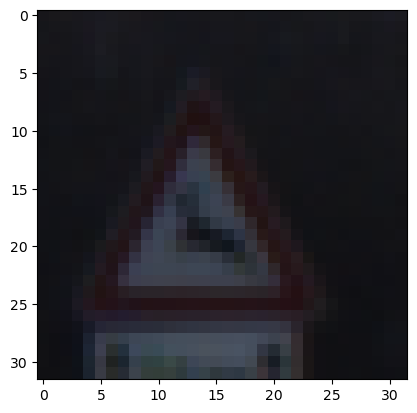

In [198]:
plt.imshow(trainX[250])

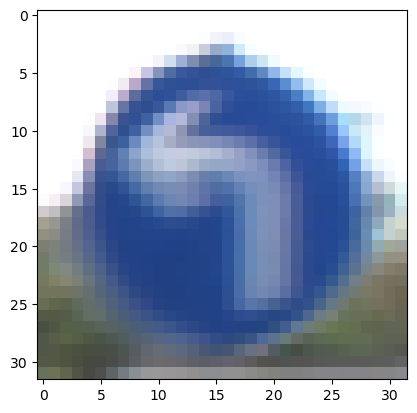

In [199]:
trainX, trainY = shuffle(trainX,trainY)
plt.imshow(trainX[0])

#### Data describing

In [200]:
# Display basic information about the loaded dataset
print("Number of training samples:", len(trainX))
print("Number of testing samples:", len(test["features"]))

Number of training samples: 34799
Number of testing samples: 12630


In [201]:
# Assuming trainX is a numpy array containing images
train_df = pd.DataFrame(trainX.reshape(len(trainX), -1), columns=[f'pixel_{i}' for i in range(trainX.shape[1]*trainX.shape[2]*trainX.shape[3])])

print(train_df.head())

    pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  0.321569  0.325490  0.388235  0.329412  0.349020  0.447059  0.321569   
2  0.372549  0.219608  0.235294  0.360784  0.180392  0.184314  0.282353   
3  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4  0.780392  0.819608  0.874510  0.776471  0.807843  0.858824  0.780392   

    pixel_7   pixel_8   pixel_9  ...  pixel_3062  pixel_3063  pixel_3064  \
0  1.000000  1.000000  1.000000  ...    0.525490    0.529412    0.525490   
1  0.345098  0.447059  0.317647  ...    0.235294    0.298039    0.258824   
2  0.133333  0.137255  0.211765  ...    0.388235    0.313725    0.329412   
3  1.000000  1.000000  1.000000  ...    0.196078    0.200000    0.152941   
4  0.815686  0.874510  0.780392  ...    0.360784    0.403922    0.423529   

   pixel_3065  pixel_3066  pixel_3067  pixel_3068  pixel_3069  pixel_3070  \
0    0.521569  

#### Statistics

In [202]:
# Basic data description
data_description = train_df.describe()


In [203]:
# Variance for each feature
variance_per_feature = train_df.var()
# Display data description
print("Data Description:")
print(data_description)
# Display variance per feature
print("\nVariance per feature:")
print(variance_per_feature)

Data Description:
            pixel_0       pixel_1       pixel_2       pixel_3       pixel_4  \
count  34799.000000  34799.000000  34799.000000  34799.000000  34799.000000   
mean       0.349708      0.343070      0.341810      0.350112      0.342987   
std        0.297408      0.298789      0.303379      0.296677      0.298538   
min        0.019608      0.015686      0.003922      0.019608      0.015686   
25%        0.121569      0.113725      0.113725      0.121569      0.113725   
50%        0.231373      0.219608      0.203922      0.231373      0.219608   
75%        0.501961      0.490196      0.498039      0.501961      0.490196   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            pixel_5       pixel_6       pixel_7       pixel_8       pixel_9  \
count  34799.000000  34799.000000  34799.000000  34799.000000  34799.000000   
mean       0.341745      0.351289      0.343619      0.342532      0.352605   
std        0.303336      0.297029

In [204]:
# mean and variance per channel
mean = np.mean(trainX, axis=(1, 2, 3))
variance = np.var(trainX, axis=(1, 2, 3))

# Display mean and variance per channel
print("Mean per channel:", mean)
print("Variance per channel:", variance)

Mean per channel: [0.590685   0.35361137 0.29172666 ... 0.0609975  0.14514782 0.26993336]
Variance per channel: [0.08176103 0.03894289 0.01669439 ... 0.00412243 0.00406554 0.0406342 ]


In [205]:
# size of the images when flattened
flat_images = trainX.reshape(len(trainX), -1)

# Get the original image shape
# original_shape = trainX.shape[1:]

print("Shape of the flat image:", flat_images.shape) # (39209 images, 3072 num of pixeles of each image)

Shape of the flat image: (34799, 3072)


#### Correlations

In [206]:
correlation_matrix = np.corrcoef(flat_images, rowvar=False)

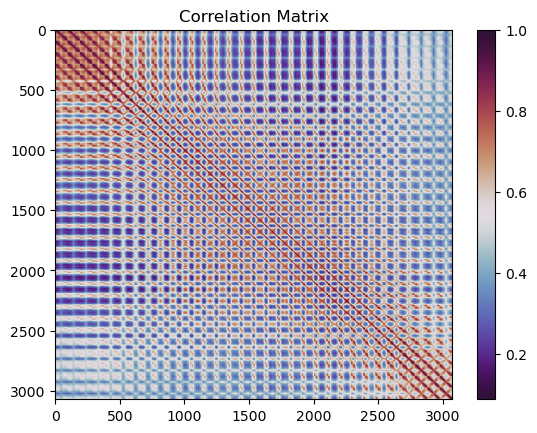

In [207]:
plt.imshow(correlation_matrix, cmap='twilight_shifted', aspect='auto')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

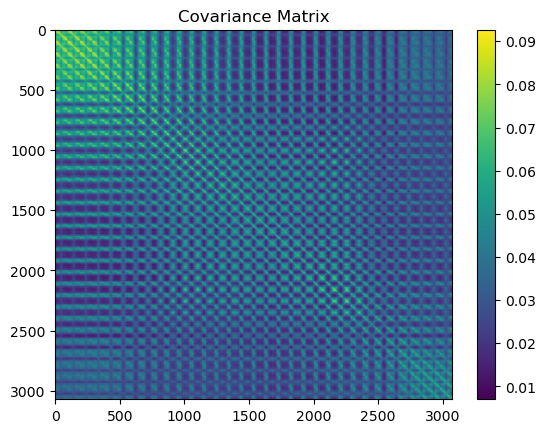

In [208]:
# Calculate the covariance matrix
covariance_matrix = np.cov(flat_images, rowvar=False)

# Visualize the covariance matrix
plt.imshow(covariance_matrix, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Covariance Matrix')
plt.show()

#### Data Describing

In [209]:
# put the data into a dataframe for easy manipulation
train_df = pd.DataFrame(trainX.reshape(len(trainX), -1), columns=[f'pixel_{i}' for i in range(trainX.shape[1]*trainX.shape[2]*trainX.shape[3])])
data_description = train_df.describe()

# Display data description
print(data_description)

            pixel_0       pixel_1       pixel_2       pixel_3       pixel_4  \
count  34799.000000  34799.000000  34799.000000  34799.000000  34799.000000   
mean       0.349708      0.343070      0.341810      0.350112      0.342987   
std        0.297408      0.298789      0.303379      0.296677      0.298538   
min        0.019608      0.015686      0.003922      0.019608      0.015686   
25%        0.121569      0.113725      0.113725      0.121569      0.113725   
50%        0.231373      0.219608      0.203922      0.231373      0.219608   
75%        0.501961      0.490196      0.498039      0.501961      0.490196   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            pixel_5       pixel_6       pixel_7       pixel_8       pixel_9  \
count  34799.000000  34799.000000  34799.000000  34799.000000  34799.000000   
mean       0.341745      0.351289      0.343619      0.342532      0.352605   
std        0.303336      0.297029      0.298468    

## Visualisation

#### Univariate 

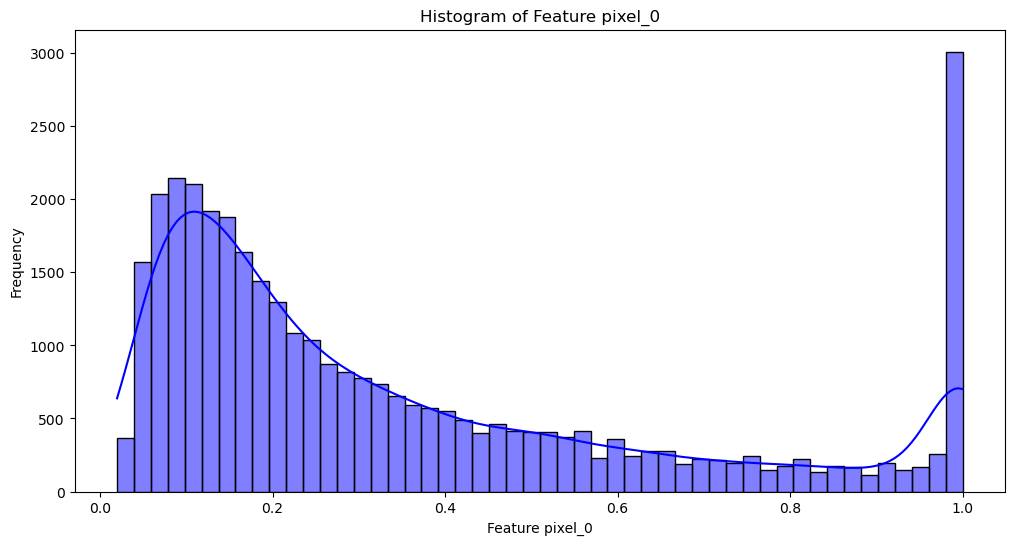

In [210]:
# Univariate Exploration: Histogram of a specific feature
plt.figure(figsize=(12, 6))
sns.histplot(train_df['pixel_0'], bins=50, kde=True, color='blue')
plt.title('Histogram of Feature pixel_0')
plt.xlabel('Feature pixel_0')
plt.ylabel('Frequency')
plt.show()



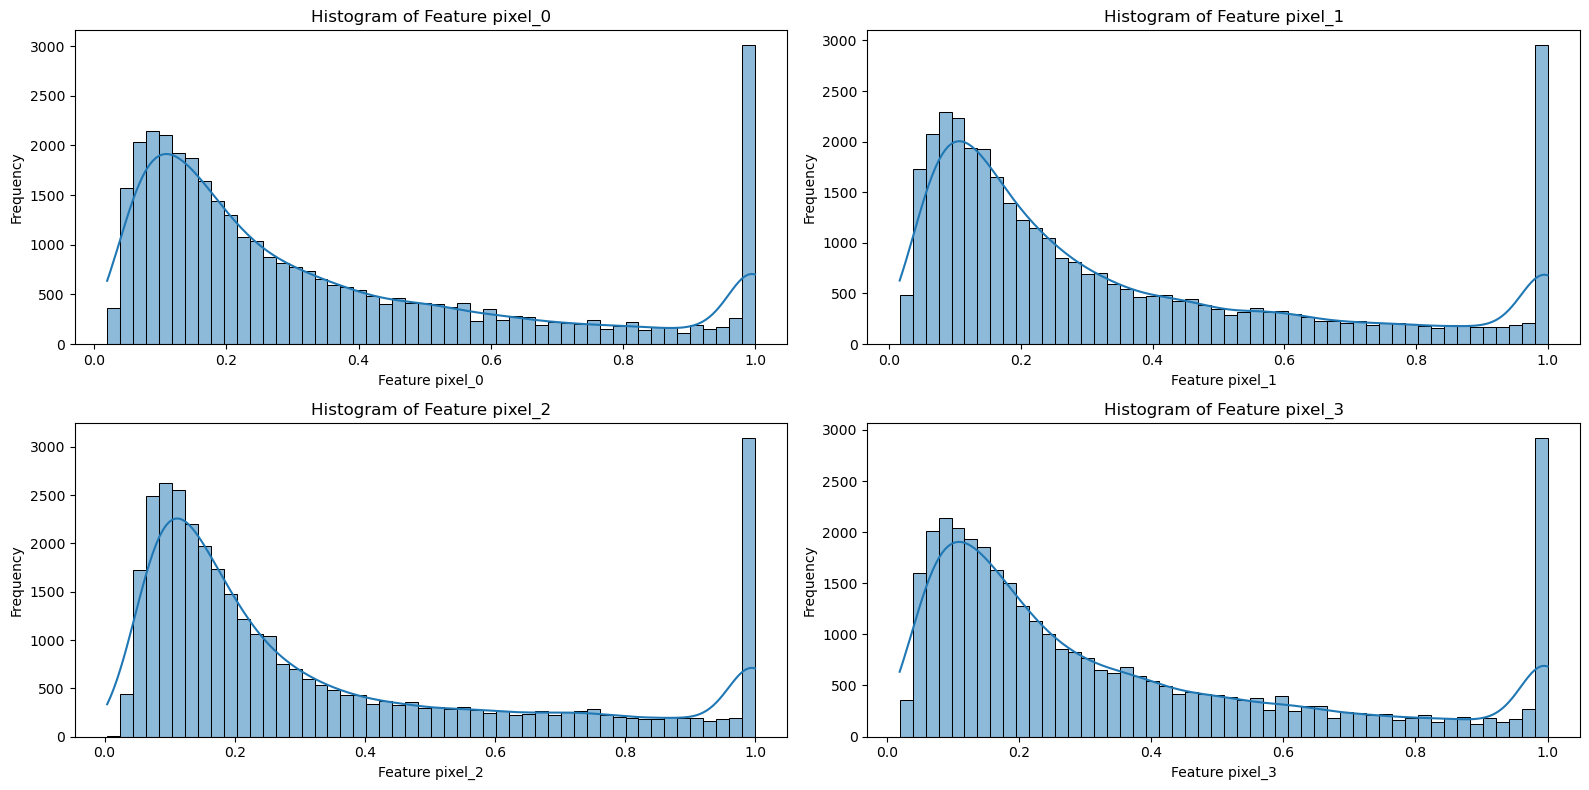

In [211]:
plt.figure(figsize=(16, 8))
for i in range(4):  # Assuming you want to plot histograms for the first four features
    plt.subplot(2, 2, i+1)
    sns.histplot(train_df[f'pixel_{i}'], bins=50, kde=True)
    plt.title(f'Histogram of Feature pixel_{i}')
    plt.xlabel(f'Feature pixel_{i}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Bivariate

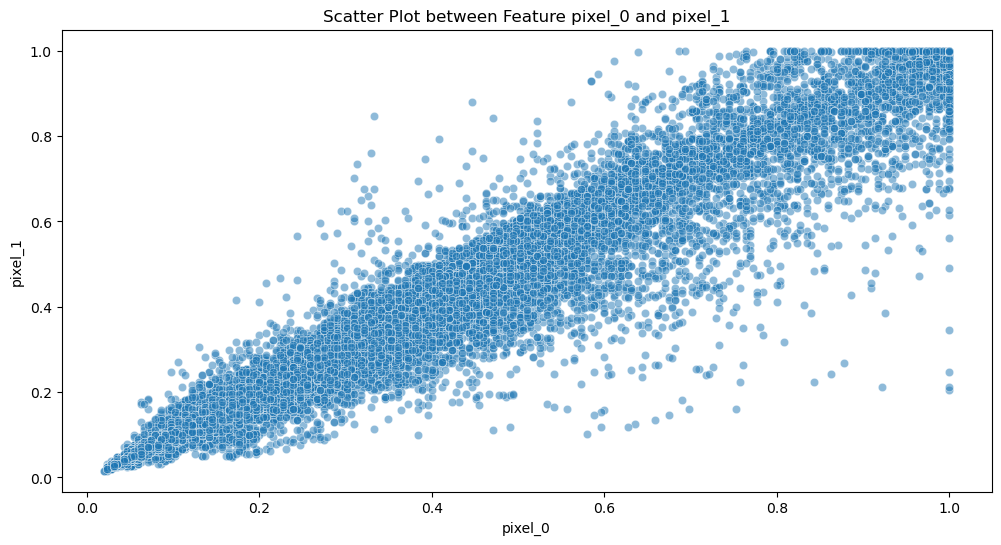

In [212]:
# Bivariate Exploration: Scatter plot between two features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pixel_0', y='pixel_1', data=train_df, alpha=0.5)
plt.title('Scatter Plot between Feature pixel_0 and pixel_1')
plt.show()

#### Multivariate

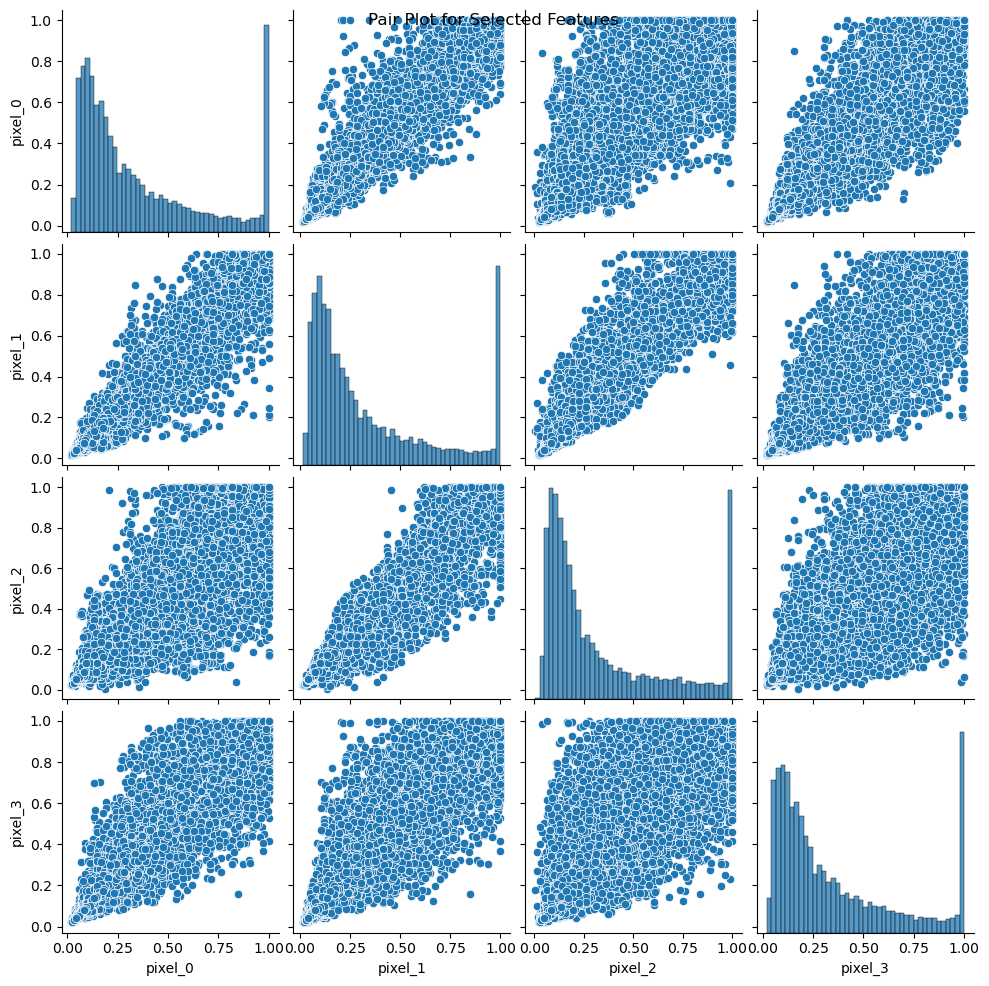

In [213]:
# Multivariate Exploration: Pair plot for multiple features
features_for_pairplot = ['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3']  # Add more features as needed
sns.pairplot(train_df[features_for_pairplot])
plt.suptitle('Pair Plot for Selected Features')
plt.show()

**since the data is already preproccessed we wont need to preprocess the data**

## Model Building

#### From Scratch Model

In [214]:
# Define the model architecture
model = Sequential()

# Add the first convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add the second convolutional layer with 32 filters and a 3x3 kernel
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add max pooling layer with a 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Add the third convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add the fourth convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add max pooling layer with a 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add dropout layer with a rate of 0.2 to prevent overfitting
model.add(Dropout(0.2))

# Add the output layer with 43 units (corresponding to the number of traffic sign classes) and softmax activation
model.add(Dense(43, activation='softmax'))

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [215]:
# Train the model
epoch = 10
h = model.fit(trainX, trainY, verbose = 1, batch_size=64, epochs=epoch, validation_data=(validX, validY))
#one of the best baest batch size is 64

Epoch 1/10
544/544 [==============================] - 22s 39ms/step - loss: 0.7776 - accuracy: 0.7832 - val_loss: 0.1994 - val_accuracy: 0.9340
Epoch 2/10
544/544 [==============================] - 21s 39ms/step - loss: 0.0657 - accuracy: 0.9814 - val_loss: 0.1263 - val_accuracy: 0.9653
Epoch 3/10
544/544 [==============================] - 24s 44ms/step - loss: 0.0393 - accuracy: 0.9881 - val_loss: 0.1619 - val_accuracy: 0.9592
Epoch 4/10
544/544 [==============================] - 23s 42ms/step - loss: 0.0255 - accuracy: 0.9924 - val_loss: 0.0986 - val_accuracy: 0.9723
Epoch 5/10
544/544 [==============================] - 23s 42ms/step - loss: 0.0211 - accuracy: 0.9938 - val_loss: 0.1345 - val_accuracy: 0.9667
Epoch 6/10
544/544 [==============================] - 23s 42ms/step - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.1361 - val_accuracy: 0.9696
Epoch 7/10
544/544 [==============================] - 23s 42ms/step - loss: 0.0169 - accuracy: 0.9951 - val_loss: 0.1169 - val_accuracy:

In [216]:
#put labels in a dataframe for further analysis 
df = pd.read_csv("./dataset/label_names.csv")
df.head(10)


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [217]:
#split the dataframe  features and labels
testX = test["features"]
testY = test["labels"]
testX = testX.astype("float") / 255.0
testY = to_categorical(testY)

In [218]:
#evaluate the model on the test set
model.evaluate(testX, testY) 
# [loss, accuracy]

395/395 [==============================] - 3s 7ms/step - loss: 0.2851 - accuracy: 0.9542


[0.2851167917251587, 0.954156756401062]

In [219]:
#print all the labels
labels = np.asarray(df["SignName"])
print(labels)

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']


In [220]:
#save the model file
model.save("traffic-cnn.h5")

1/1 [==============================] - 0s 194ms/step
prediction : [17] No entry
actual:  17 No entry


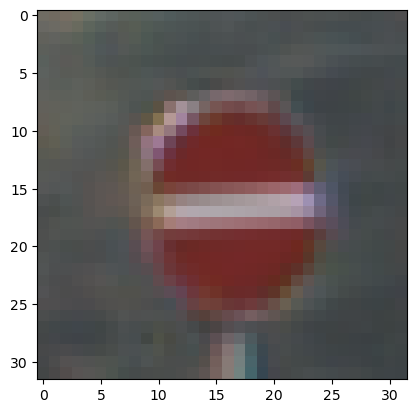

In [221]:
# test the model on a random image
# This code selects a random image from the test dataset, predicts its label using the first model (model),
# and compares the predicted label with the actual label. It then displays the image along with the prediction and actual label.
testIdx = np.random.randint(0, len(testX))
p = model.predict(testX[testIdx:testIdx+1])
idx = np.argmax(p, axis=1)
plt.imshow(testX[testIdx])
print("prediction :", idx, labels[idx][0])
print("actual: ",np.argmax(np.asarray(testY[testIdx])), labels[np.argmax(np.asarray(testY[testIdx]))])

#### Pretrained Model

##### Resnet 50 model with no weights

In [222]:
# Create ResNet50 model without pre-trained weights
resnet = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))
# Get the output tensor from ResNet50
x = resnet.output
# Apply global average pooling to reduce spatial dimensions
x = GlobalAveragePooling2D()(x)
# Apply dropout regularization to prevent overfitting
x = Dropout(0.5)(x)
# Add a fully connected layer with softmax activation for 43 traffic sign classes
predictions = Dense(43, activation='softmax')(x)
# Create the final model by specifying the input and output tensors
model2 = Model(inputs=resnet.input, outputs=predictions)
# Model summary
model2.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [223]:
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
epochs2 = 5
h2 =  model.fit(testX, testY,  batch_size = 32, epochs = epochs2, verbose = 1, validation_data = (validX, validY))


Epoch 1/5
395/395 [==============================] - 11s 27ms/step - loss: 0.0934 - accuracy: 0.9755 - val_loss: 0.1040 - val_accuracy: 0.9703
Epoch 2/5
395/395 [==============================] - 10s 25ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0925 - val_accuracy: 0.9760
Epoch 3/5
395/395 [==============================] - 10s 26ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.1716 - val_accuracy: 0.9569
Epoch 4/5
395/395 [==============================] - 11s 27ms/step - loss: 0.0103 - accuracy: 0.9978 - val_loss: 0.1106 - val_accuracy: 0.9685
Epoch 5/5
395/395 [==============================] - 10s 26ms/step - loss: 0.0151 - accuracy: 0.9966 - val_loss: 0.1153 - val_accuracy: 0.9746


1/1 [==============================] - 0s 178ms/step
prediction : [17] No entry
actual:  4 Speed limit (70km/h)


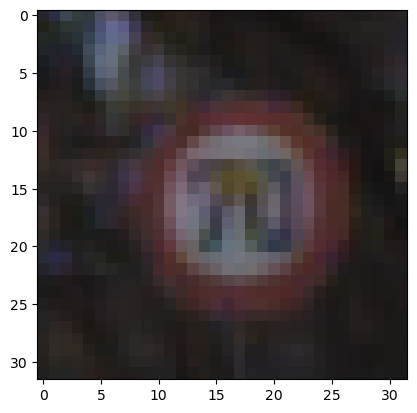

In [240]:
# test the model on a random image
# This code selects a random image from the test dataset, predicts its label using the second model (model2),
# and compares the predicted label with the actual label. It then displays the image along with the prediction and actual label.

testIdx2 = np.random.randint(0, len(testX))
p2 = model2.predict(testX[testIdx2:testIdx2+1])
idx2 = np.argmax(p, axis=1)
plt.imshow(testX[testIdx2])
print("prediction :", idx2, labels[idx2][0])
print("actual: ",np.argmax(np.asarray(testY[testIdx2])), labels[np.argmax(np.asarray(testY[testIdx2]))])


## Evaluation

#### 1st Model

In [225]:
train_accuracy = h.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy}')

train_loss = h.history['loss'][-1]
print(f'Training Loss: {train_loss}')



Training Accuracy: 0.9964366555213928
Training Loss: 0.012031815946102142


In [226]:
val_accuracy = model.evaluate(validX, validY, verbose=1)[1]
print(f'Test Accuracy: {val_accuracy}')

val_loss = model.evaluate(validX, validY, verbose=1)[0]
print(f'validation Loss: {val_loss}')

138/138 [==============================] - 1s 8ms/step - loss: 0.1153 - accuracy: 0.9746
Test Accuracy: 0.9746031761169434
138/138 [==============================] - 1s 8ms/step - loss: 0.1153 - accuracy: 0.9746
validation Loss: 0.11526107788085938


In [227]:
test_accuracy = model.evaluate(testX, testY, verbose=1)[1]
print(f'Test Accuracy: {test_accuracy}')

test_loss = model.evaluate(testX, testY, verbose=1)[0]
print(f'Test Loss: {test_loss}')

395/395 [==============================] - 3s 8ms/step - loss: 7.8681e-04 - accuracy: 0.9998
Test Accuracy: 0.9998416304588318
395/395 [==============================] - 4s 10ms/step - loss: 7.8681e-04 - accuracy: 0.9998
Test Loss: 0.0007868097745813429


#### 2nd Model

In [228]:
train_accuracy2 = h2.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy2}')

train_loss2 = h2.history['loss'][-1]
print(f'Training Loss: {train_loss2}')


Training Accuracy: 0.9965953826904297
Training Loss: 0.015094286762177944


In [229]:
val_accuracy2 = model2.evaluate(validX, validY, verbose=1)[1]
print(f'Test Accuracy: {val_accuracy2}')

val_loss2 = model2.evaluate(validX, validY, verbose=1)[0]
print(f'validation Loss: {val_loss2}')

138/138 [==============================] - 14s 90ms/step - loss: 3.7608 - accuracy: 0.0095
Test Accuracy: 0.009523809887468815
138/138 [==============================] - 12s 89ms/step - loss: 3.7608 - accuracy: 0.0095
validation Loss: 3.760754108428955


In [230]:
test_accuracy2 = model2.evaluate(testX, testY, verbose=1)[1]
print(f'Test Accuracy: {test_accuracy2}')

test_loss2 = model2.evaluate(testX, testY, verbose=1)[0]
print(f'Test Loss: {test_loss2}')

395/395 [==============================] - 37s 95ms/step - loss: 3.7607 - accuracy: 0.0108
Test Accuracy: 0.010768013074994087
395/395 [==============================] - 38s 96ms/step - loss: 3.7607 - accuracy: 0.0108
Test Loss: 3.7606678009033203


the second model is over fitting on training and have very low accurcy on validation and testing 

the second model(pre-trained) compared to the first model(from scratch) plot


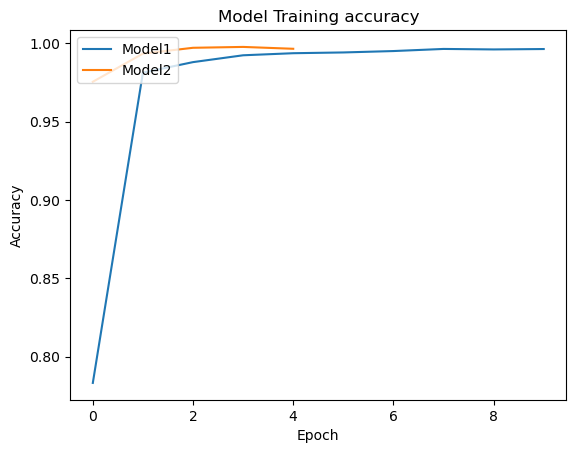

In [234]:
# Plot training & validation accuracy values between the two models
plt.plot(h.history['accuracy'])
plt.plot(h2.history['accuracy'])
plt.title('Model Training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model1', 'Model2'], loc='upper left')
plt.show()

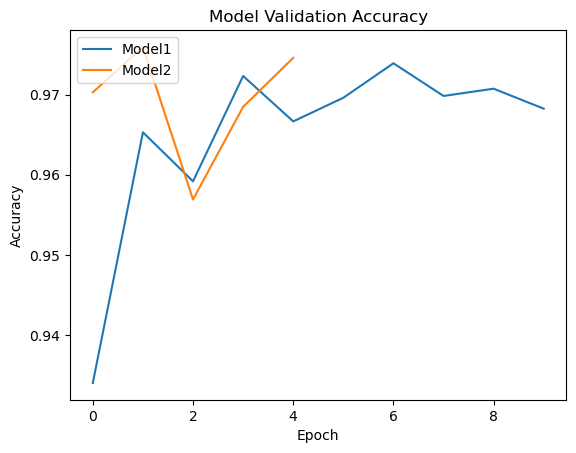

In [235]:
# Plot testing accuracy values between the two models
plt.plot(h.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model1', 'Model2'], loc='upper left')
plt.show()
    

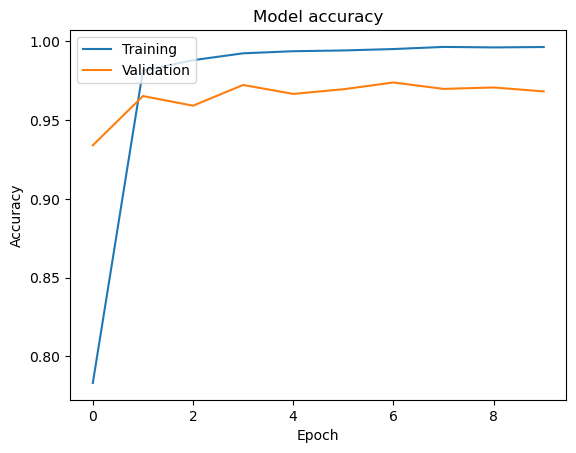

In [233]:
#plot the validation accuracy and epochs to the first model
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
